In [95]:
!pip install nltk
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import os
import time

You should consider upgrading via the 'C:\Users\Kyrylo_Polinchuk\Python\Kyrylo\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [96]:
rewrite = True

In [97]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
num_samples_train = train_data.shape[0]
num_samples_test = test_data.shape[0]
print("Number of samples in the train dataset:", num_samples_train)
print("Number of samples in the test dataset:", num_samples_test)

Number of samples in the train dataset: 159571
Number of samples in the test dataset: 63978


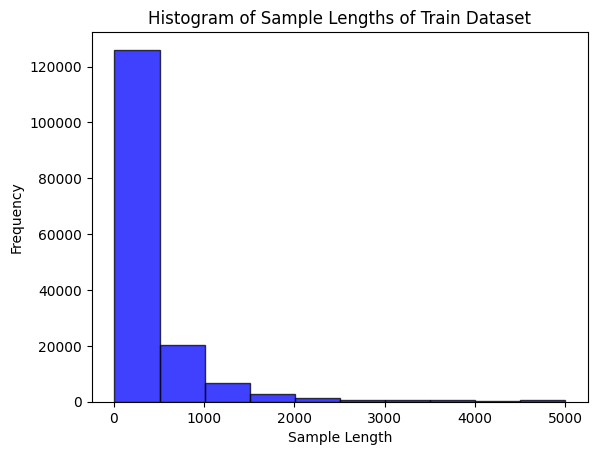

In [98]:
train_data['sample_length'] = train_data['comment_text'].apply(len)
plt.hist(train_data['sample_length'], bins=10, alpha=0.75, color='b', edgecolor='black') 
plt.xlabel('Sample Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Lengths of Train Dataset')
plt.show()

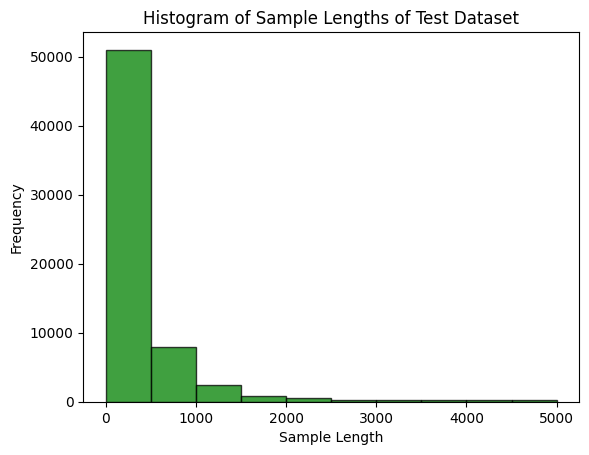

<Figure size 640x480 with 0 Axes>

In [99]:
test_data['sample_length'] = test_data['comment_text'].apply(len)
plt.hist(test_data['sample_length'], bins=10, alpha=0.75, color='g', edgecolor='black') 
plt.xlabel('Sample Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Lengths of Test Dataset')
plt.show()
plt.clf()

In [100]:
def calculate_sample_stats(sample):
    num_chars = len(sample)
    words = nltk.word_tokenize(sample)
    num_words = len(words)
    num_symbols = len([char for char in sample if char.isalnum() or char.isspace()])
    num_capital_letters = sum(1 for char in sample if char.isupper())
    
    return num_chars, num_words, num_symbols, num_capital_letters

train_data['num_chars'], train_data['num_words'], train_data['num_symbols'], train_data['num_capital_letters'] = zip(*train_data['comment_text'].apply(calculate_sample_stats))
train_data['percentage_capital_letters'] = (train_data['num_capital_letters'] / train_data['num_chars']) * 100
print(train_data)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [101]:
test_data['num_chars'], test_data['num_words'], test_data['num_symbols'], test_data['num_capital_letters'] = zip(*test_data['comment_text'].apply(calculate_sample_stats))
test_data['percentage_capital_letters'] = (test_data['num_capital_letters'] / test_data['num_chars']) * 100
print(test_data)

       Unnamed: 0                id  \
0               5  0001ea8717f6de06   
1               7  000247e83dcc1211   
2              11  0002f87b16116a7f   
3              13  0003e1cccfd5a40a   
4              14  00059ace3e3e9a53   
...           ...               ...   
63973      153150  fff8f64043129fa2   
63974      153151  fff9d70fe0722906   
63975      153154  fffa8a11c4378854   
63976      153155  fffac2a094c8e0e2   
63977      153156  fffb5451268fb5ba   

                                            comment_text  sample_length  \
0      Thank you for understanding. I think very high...             96   
1                       :Dear god this site is horrible.             32   
2      "::: Somebody will invariably try to add Relig...            448   
3      " \n\n It says it right there that it IS a typ...            501   
4      " \n\n == Before adding a new product to the l...            334   
...                                                  ...            ...   
63973 

In [102]:
count_zero_values = train_data[(train_data['toxic'] == 0) & (train_data['severe_toxic'] == 0) & (train_data['obscene'] == 0) & (train_data['threat'] == 0) & (train_data['insult'] == 0) & (train_data['identity_hate'] == 0)]
count_zero_values = count_zero_values.shape[0]
print("Comments with all 0 labels:", count_zero_values)

Comments with all 0 labels: 143346


In [103]:
filtered_train_data = train_data.query('toxic != 0 or severe_toxic != 0 or obscene != 0 or threat != 0 or insult != 0 or identity_hate != 0')
filtered_train_data.shape[0]
print(filtered_train_data.shape[0])

16225


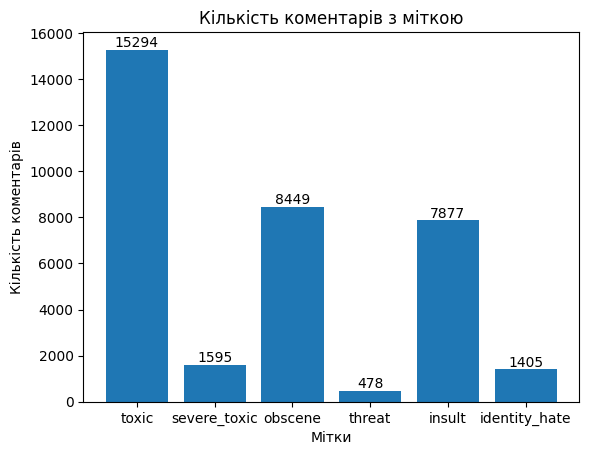

<Figure size 640x480 with 0 Axes>

In [104]:
toxic_count = filtered_train_data[filtered_train_data['toxic'] == 1].shape[0]
severe_toxic_count = filtered_train_data[filtered_train_data['severe_toxic'] == 1].shape[0]
obscene_count = filtered_train_data[filtered_train_data['obscene'] == 1].shape[0]
threat_count = filtered_train_data[filtered_train_data['threat'] == 1].shape[0]
insult_count = filtered_train_data[filtered_train_data['insult'] == 1].shape[0]
identity_hate_count = filtered_train_data[filtered_train_data['identity_hate'] == 1].shape[0]

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

counts = [toxic_count, severe_toxic_count, obscene_count, threat_count, insult_count, identity_hate_count]

plt.bar(labels, counts)
plt.xlabel('Мітки')
plt.ylabel('Кількість коментарів')
plt.title('Кількість коментарів з міткою')

for i, count in enumerate(counts):
    plt.text(labels[i], count, str(count), ha='center', va='bottom')

plt.show()
plt.clf()

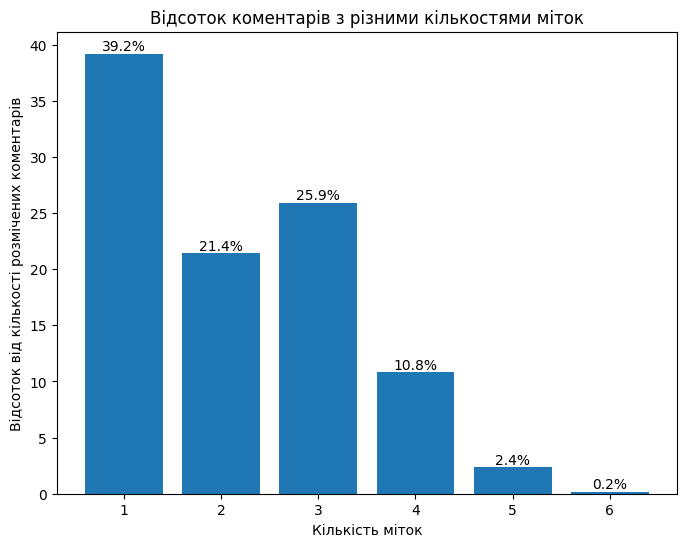

In [105]:
copy = train_data.query('toxic != 0 or severe_toxic != 0 or obscene != 0 or threat != 0 or insult != 0 or identity_hate != 0').copy()
copy['total_sum'] = copy[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)

total_sum_counts = copy['total_sum'].value_counts()
total_rows = copy.shape[0]
percentages = []

for i in range(1, 7):
    percentage = total_sum_counts.get(i, 0) / total_rows * 100
    percentages.append(percentage)

# Создаем график
plt.figure(figsize=(8, 6))
plt.bar(range(1, 7), percentages)
plt.xlabel('Кількість міток')
plt.ylabel('Відсоток від кількості розмічених коментарів')
plt.title('Відсоток коментарів з різними кількостями міток')
plt.xticks(range(1, 7), range(1, 7))

for i, percentage in enumerate(percentages):
    plt.text(i + 1, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

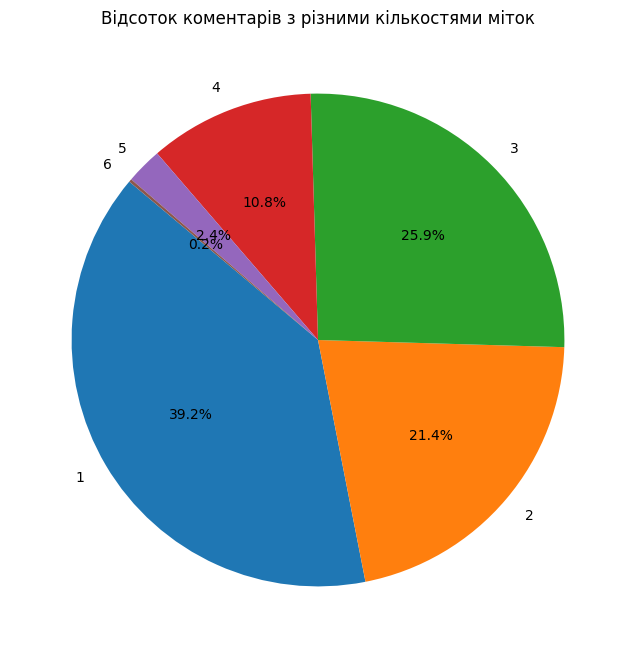

In [106]:
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=range(1,7), autopct='%1.1f%%', startangle=140)
plt.title('Відсоток коментарів з різними кількостями міток')

plt.show()

In [107]:
copy = None

In [108]:
train_statistics = train_data[['id', 'sample_length', 'num_words', 'num_symbols', 'num_capital_letters', 'percentage_capital_letters']]
test_statistics = test_data[['id', 'sample_length', 'num_words', 'num_symbols', 'num_capital_letters', 'percentage_capital_letters']]

In [109]:
file_names = ['train_statistics.csv', 'test_statistics.csv']
folder_name = 'Statistics'
folder_name_index = 'Statistics_index'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

if rewrite:
    for file_name in file_names:
        file_path = os.path.join(folder_name, file_name)
        if os.path.exists(file_path):
            os.remove(file_path)
        if file_name == 'train_statistics.csv':
            train_statistics.to_csv(file_path, index=False)
        elif file_name == 'test_statistics.csv':
            test_statistics.to_csv(file_path, index=False)
    print(f'Data was rewritten in {folder_name}')

else:
    if not os.path.exists(folder_name_index):
        os.makedirs(folder_name_index)
    time_index = str(time.time())
    for file_name in file_names:
        unique_file_name = os.path.join(folder_name_index, f"{file_name.split('.')[0]}_{int(time.time())}.{file_name.split('.')[1]}")
        if file_name == 'train_statistics.csv':
            train_statistics.to_csv(unique_file_name, index=False)
        else: 
            test_statistics.to_csv(unique_file_name, index=False)
    print(f'Data was added to {folder_name_index}')

Data was rewritten in Statistics
